In [1]:
import pandas as pd

# Load the Titanic dataset
titanic_data = pd.read_csv('Titanic.csv')

# Preview the first few rows
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
# Check for missing data and data types
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
#cleaning the data

# Fill missing Age with the median value
titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)

# Fill missing Embarked with the most frequent value (mode)
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)

# Drop any other rows with missing data if necessary
titanic_data.dropna(inplace=True)

<ipython-input-3-f11665bfe869>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)
<ipython-input-3-f11665bfe869>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpl

In [4]:
# Descriptive statistics for numerical columns
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000
mean,455.401961,0.666667,1.196078,35.100098,0.441176,0.436275,76.141504
std,251.379279,0.472564,0.525961,15.100836,0.628918,0.729976,74.391749
min,2.000000,0.000000,1.000000,0.920000,0.000000,0.000000,0.000000
25%,261.750000,0.000000,1.000000,25.000000,0.000000,0.000000,29.453125
50%,457.500000,1.000000,1.000000,34.000000,0.000000,0.000000,55.220850
75%,684.000000,1.000000,1.000000,47.000000,1.000000,1.000000,89.328150
max,890.000000,1.000000,3.000000,80.000000,3.000000,4.000000,512.329200


In [5]:
#survival rate
# Calculate overall survival rate
survival_rate = titanic_data['Survived'].mean()
print(f"Overall Survival Rate: {survival_rate * 100:.2f}%")

Overall Survival Rate: 66.67%


In [6]:
#survival rate by gender
# Group by Gender and calculate survival rate
survival_by_gender = titanic_data.groupby('Sex')['Survived'].mean()
print(survival_by_gender)

Sex
female    0.938144
male      0.420561
Name: Survived, dtype: float64


In [7]:
#survival by ticket class
survival_by_class = titanic_data.groupby('Pclass')['Survived'].mean()
print(survival_by_class)

Pclass
1    0.664773
2    0.812500
3    0.500000
Name: Survived, dtype: float64


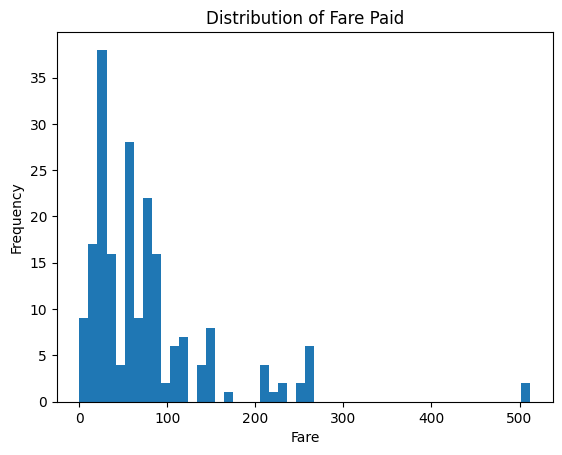

In [8]:
# Histogram of Fare
import matplotlib.pyplot as plt
plt.hist(titanic_data['Fare'], bins=50)
plt.title('Distribution of Fare Paid')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

In [9]:
# Create an age group column
age_groups = pd.cut(titanic_data['Age'], bins=[0, 12, 18, 30, 40, 50, 60, 100],
                    labels=["0-12", "13-18", "19-30", "31-40", "41-50", "51-60", "60+"])

# Survival by Age Group
survival_by_age = titanic_data.groupby(age_groups)['Survived'].mean()
print(survival_by_age)

Age
0-12     0.818182
13-18    0.916667
19-30    0.676923
31-40    0.760000
41-50    0.515152
51-60    0.636364
60+      0.272727
Name: Survived, dtype: float64


<ipython-input-9-cd3e0f6667f3>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_age = titanic_data.groupby(age_groups)['Survived'].mean()


In [10]:
# Survival by Embarked port
survival_by_embarked = titanic_data.groupby('Embarked')['Survived'].mean()
print(survival_by_embarked)

Embarked
C    0.753623
Q    0.500000
S    0.625954
Name: Survived, dtype: float64


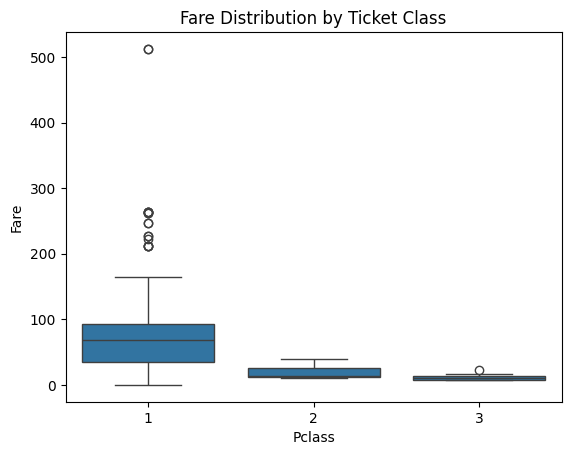

In [11]:
# Fare vs. Pclass
import seaborn as sns
sns.boxplot(x='Pclass', y='Fare', data=titanic_data)
plt.title('Fare Distribution by Ticket Class')
plt.show()

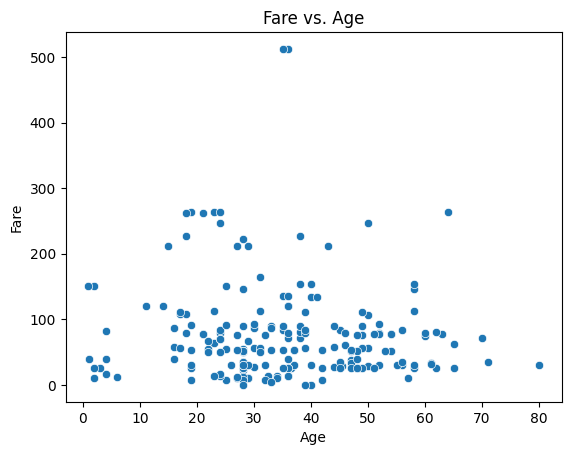

In [16]:
# Scatter plot of Fare vs. Age
sns.scatterplot(x='Age', y='Fare', data=titanic_data)
plt.title('Fare vs. Age')
plt.show()